# Testing Optimization

This notebook is used to test the optimization of payouts. We will see how strongly the optimization depends on the number of events in our data set.

In [3]:
#import general packages
import numpy as np
import matplotlib.pyplot as plt
from colorama import Fore, Style, Back

%load_ext autoreload
%autoreload 2
import exposures as ex
import impact as cimp
import bound_prot_dam as bpd
import haz_int_grd as hig
import set_nominal as snom
import alt_pay_opt as apo

c:\Users\kaibe\miniforge3\envs\climada_env\lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


### Define Bond Characteristics

In [4]:
#choose country using 3-digits numeric country code
kitts = 659 #St. Kitts and Nevis
grenada = 308 #Grenada
comoros = 174 #Comors

#define minimum return period to be covered
lower_rp = 25

#define maximum return period to be covered
upper_rp = 100

### Assess Natural Hazard Risk


#### Generate Exposure Data and TC Hazards 

In [5]:
exp_kitts, applicable_basins_kitts, grid_gdf_kitts, admin_gdf_kitts, storm_basin_sub_kitts, tc_storms_kitts = ex.init_TC_exp(kitts, 
                                                                                                                             load_fls=True,
                                                                                                                             plot_centrs=False,
                                                                                                                             plt_grd=False,
                                                                                                                             plot_exp=False)

exp_gren, applicable_basins_gren, grid_gdf_gren, admin_gdf_gren, storm_basin_sub_gren, tc_storms_gren = ex.init_TC_exp(grenada, 
                                                                                                                       load_fls=True,
                                                                                                                       plot_centrs=False,
                                                                                                                       plt_grd=False,
                                                                                                                       plot_exp=False)

exp_com, applicable_basins_com, grid_gdf_com, admin_gdf_com, storm_basin_sub_com, tc_storms_com = ex.init_TC_exp(comoros, 
                                                                                                                 load_fls=True,
                                                                                                                 plot_centrs=False,
                                                                                                                 plt_grd=False,
                                                                                                                 plot_exp=False)

Number of tracks in NA basin: 946
Number of tracks in NA basin: 2692
Number of tracks in SI basin: 229


#### Calculate Impact

c:\Users\kaibe\Documents\ETH_Zurich\Thesis\Code\impact.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


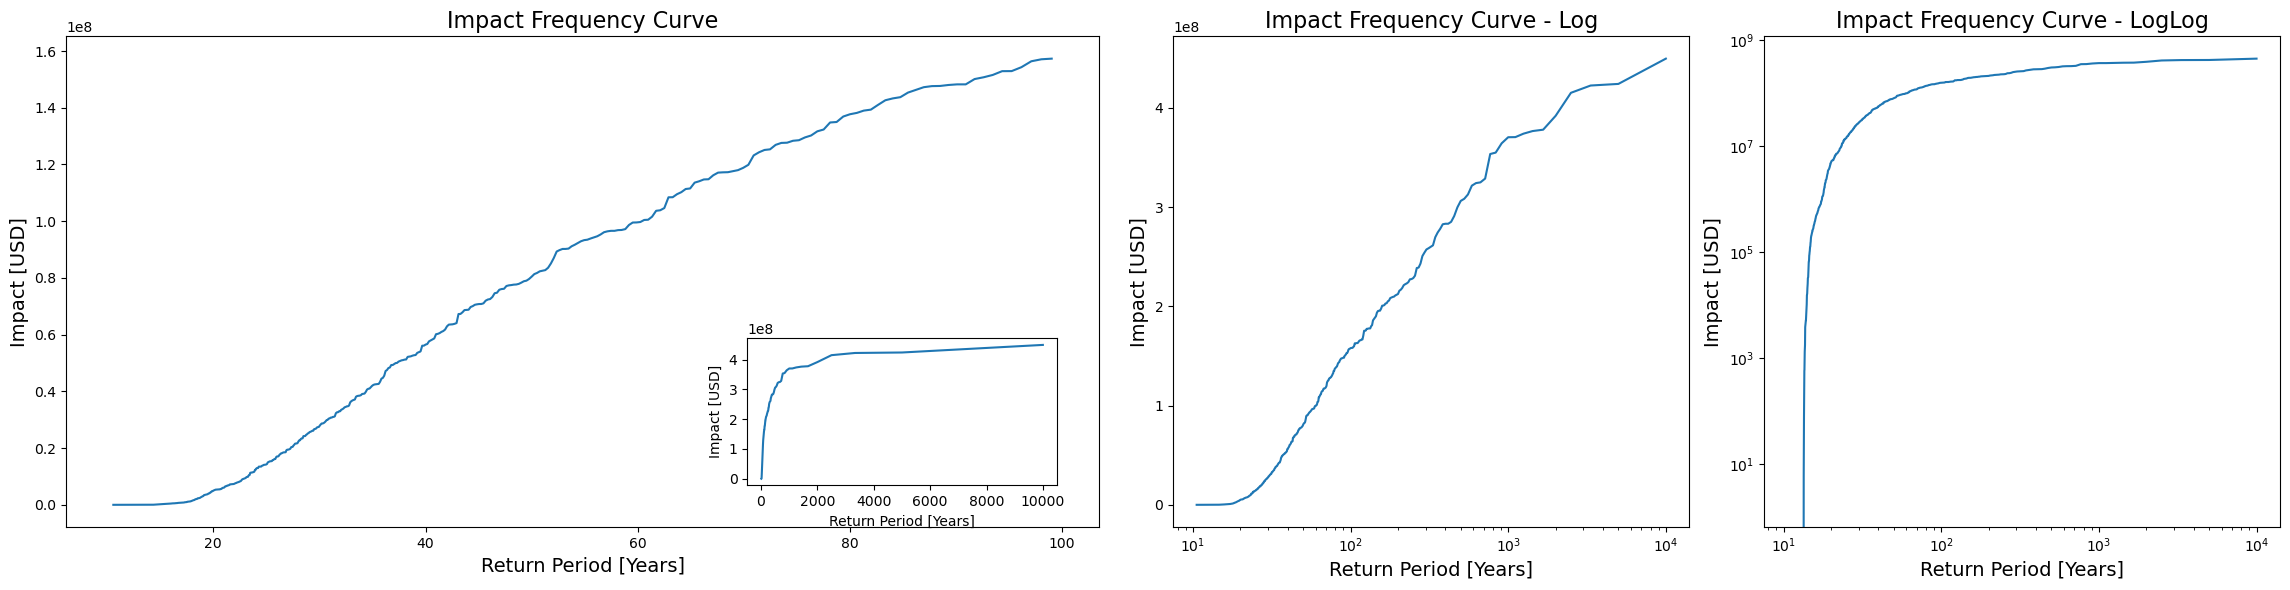

c:\Users\kaibe\Documents\ETH_Zurich\Thesis\Code\impact.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


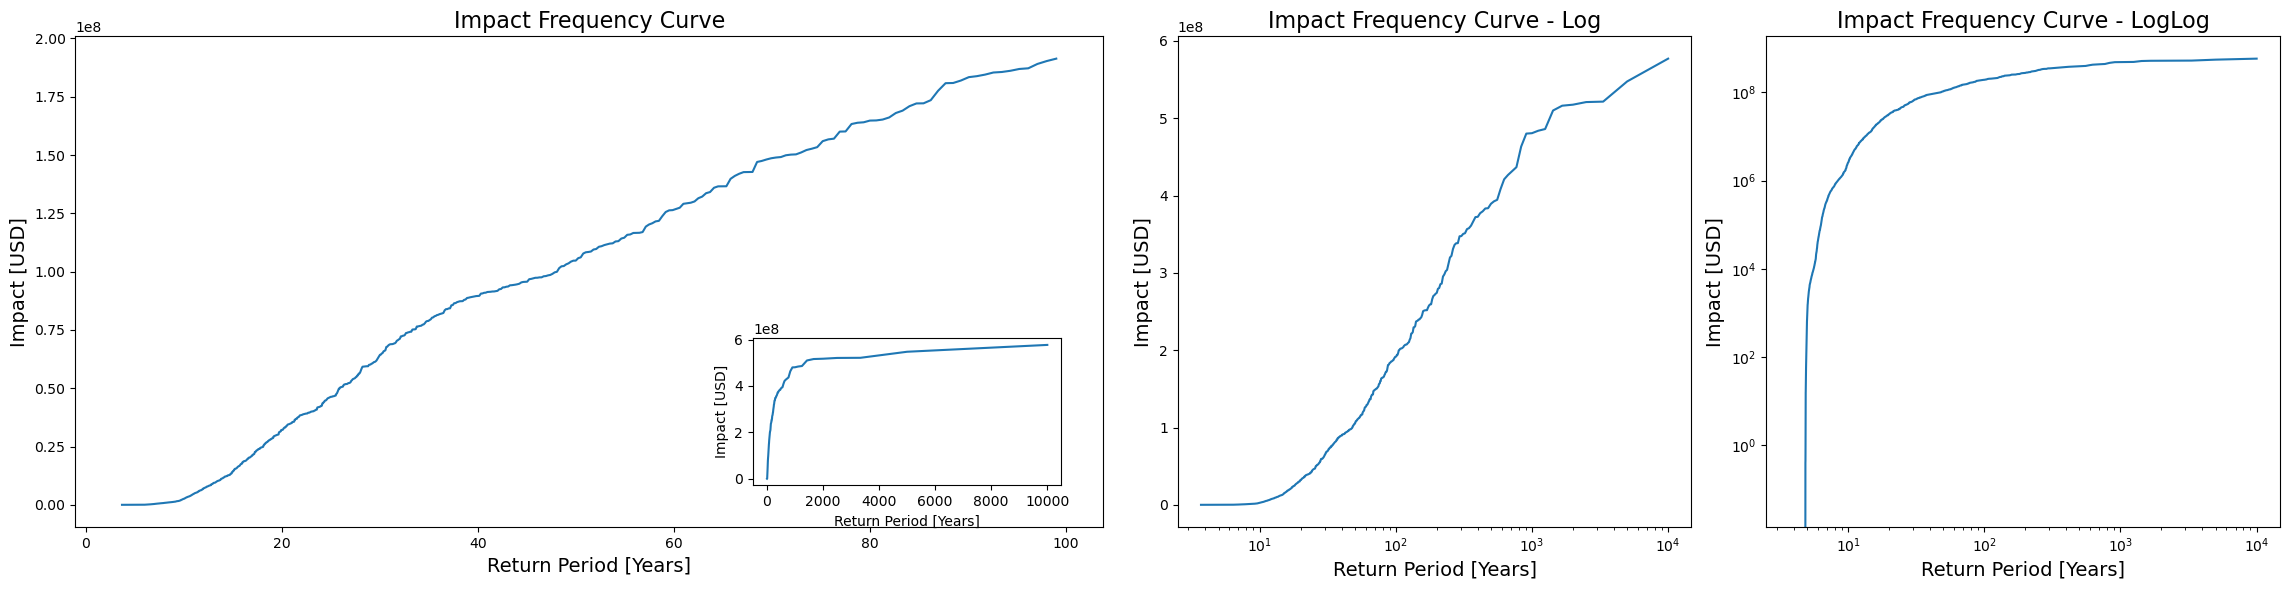

c:\Users\kaibe\Documents\ETH_Zurich\Thesis\Code\impact.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


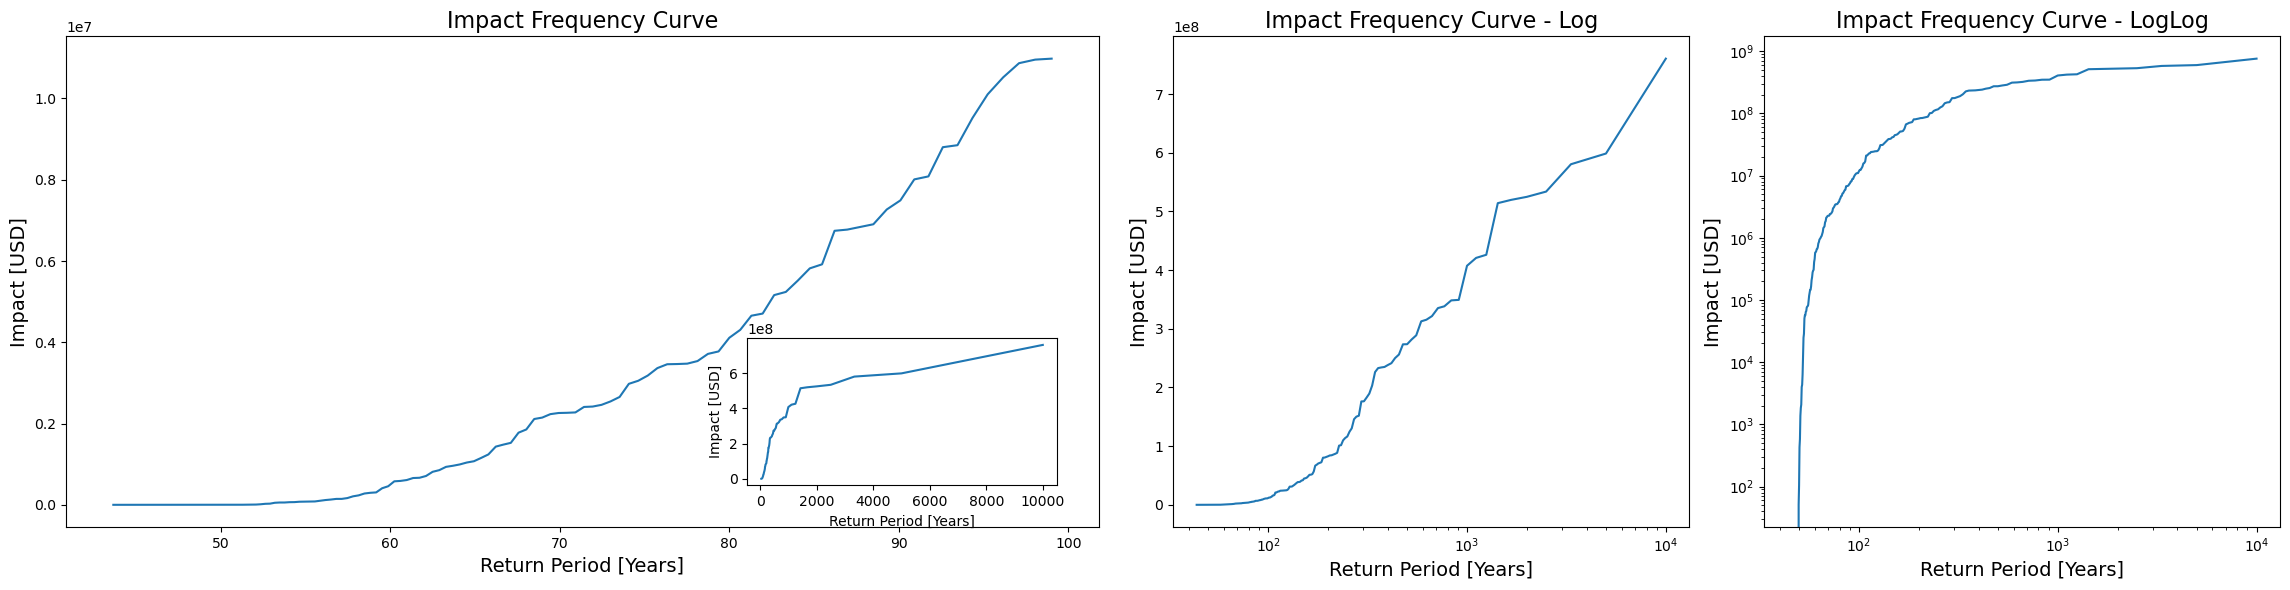

In [6]:
imp_kitts, imp_per_event_kitts, imp_admin_evt_kitts = cimp.init_imp(exp_kitts, tc_storms_kitts, admin_gdf_kitts) 
imp_gren, imp_per_event_gren, imp_admin_evt_gren = cimp.init_imp(exp_gren, tc_storms_gren, admin_gdf_gren) 
imp_com, imp_per_event_com, imp_admin_evt_com = cimp.init_imp(exp_com, tc_storms_com, admin_gdf_com) 

imp_per_event_flt_kitts, imp_admin_evt_flt_kitts, to_protect_kitts = bpd.init_imp_flt(imp_per_event_kitts, imp_admin_evt_kitts, lower_rp)
imp_per_event_flt_gren, imp_admin_evt_flt_gren, to_protect_gren = bpd.init_imp_flt(imp_per_event_gren, imp_admin_evt_gren, lower_rp)
imp_per_event_flt_com, imp_admin_evt_flt_com, to_protect_com = bpd.init_imp_flt(imp_per_event_com, imp_admin_evt_com, lower_rp)

#### Extract Hazard Intensity per Event and Subarea


In [7]:
int_grid_kitts = hig.init_haz_int(grid_gdf_kitts, admin_gdf_kitts, tc_storms=tc_storms_kitts, stat='mean') 
int_grid_gren = hig.init_haz_int(grid_gdf_gren, admin_gdf_gren, tc_storms=tc_storms_gren, stat='mean') 
int_grid_com = hig.init_haz_int(grid_gdf_com, admin_gdf_com, tc_storms=tc_storms_com, stat='mean') 

#### Calculate Needed Capital


In [22]:
#define nominal
nominal_kitts = snom.init_nominal(impact=imp_kitts, exposure=exp_kitts, prot_rp=upper_rp)
nominal_gren = snom.init_nominal(impact=imp_gren, exposure=exp_gren, prot_rp=upper_rp)
nominal_com = snom.init_nominal(impact=imp_com, exposure=exp_com, prot_rp=upper_rp)

The principal of the cat bond is: 157872286.182 [USD]
Principal as share of GDP: 0.179
The principal of the cat bond is: 191571159.919 [USD]
Principal as share of GDP: 0.184
The principal of the cat bond is: 11740960.804 [USD]
Principal as share of GDP: 0.01


#### Test Optimization of Payout Function


In [23]:
divisor = 10 #-> defines sample size

Test optimization for all countries by subsequently performing the optimization using more data points (=hazards) and ploting the results

St. Kitts and Nevis

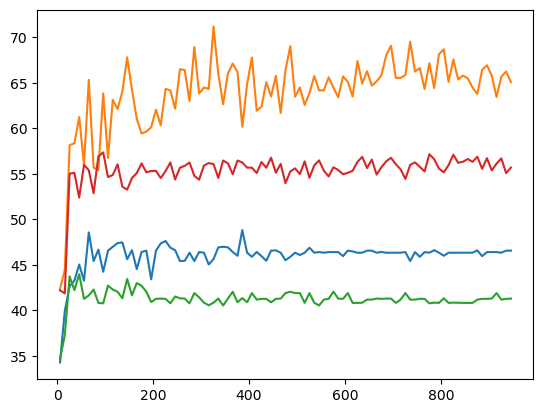

In [24]:
x_kitts = len(int_grid_kitts) % divisor 
n_kitts = len(int_grid_kitts) // divisor 
optimized_step1 = {}
optimized_step2 = {}
p = []

for i in range(n_kitts+1):

    # Randomly select x rows
    sampled_int_grid = int_grid_kitts.sample(n=x_kitts)
    sampled_imp_admin_evt_flt = imp_admin_evt_flt_kitts.loc[sampled_int_grid.index]

    result, optimized_step1[i], optimized_step2[i] = apo.init_alt_optimization(sampled_int_grid, nominal_kitts, damages_grid=sampled_imp_admin_evt_flt, print_params=False)
    p.append(x_kitts)
    x_kitts += divisor

for j in range(len(optimized_step1[0]+1)): 

    elements_x = [arr[j] for arr in optimized_step1.values()]
    elements_y = [arr[j] for arr in optimized_step2.values()]

    plt.plot(p, elements_x)
    plt.plot(p, elements_y)
    

Grenada

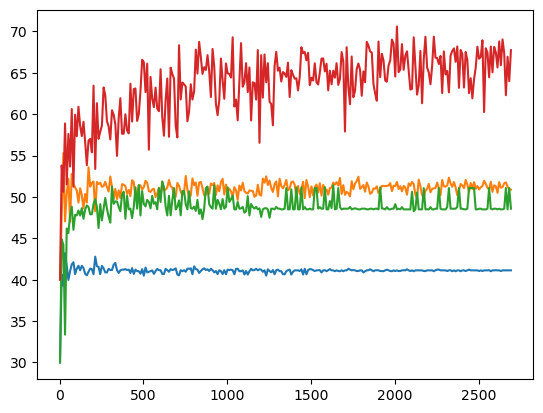

In [25]:
x_gren = len(int_grid_gren) % divisor 
n_gren = len(int_grid_gren) // divisor 
optimized_step1 = {}
optimized_step2 = {}
p = []

for i in range(n_gren+1):

    # Randomly select x rows
    sampled_int_grid = int_grid_gren.sample(n=x_gren)
    sampled_imp_admin_evt_flt = imp_admin_evt_flt_gren.loc[sampled_int_grid.index]

    result, optimized_step1[i], optimized_step2[i] = apo.init_alt_optimization(sampled_int_grid, nominal_gren, damages_grid=sampled_imp_admin_evt_flt, print_params=False)
    p.append(x_gren)
    x_gren += divisor

for j in range(len(optimized_step1[0]+1)): 

    elements_x = [arr[j] for arr in optimized_step1.values()]
    elements_y = [arr[j] for arr in optimized_step2.values()]

    plt.plot(p, elements_x)
    plt.plot(p, elements_y)

Comoros

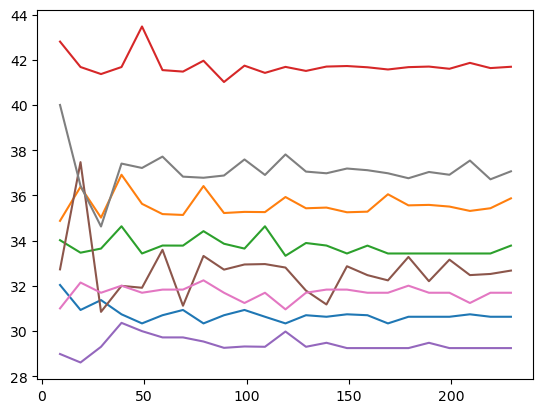

In [26]:
x_com = len(int_grid_com) % divisor 
n_com = len(int_grid_com) // divisor 
optimized_step1 = {}
optimized_step2 = {}
p = []

for i in range(n_com+1):

    # Randomly select x rows
    sampled_int_grid = int_grid_com.sample(n=x_com)
    sampled_imp_admin_evt_flt = imp_admin_evt_flt_com.loc[sampled_int_grid.index]

    result, optimized_step1[i], optimized_step2[i] = apo.init_alt_optimization(sampled_int_grid, nominal_com, damages_grid=sampled_imp_admin_evt_flt, print_params=False)
    p.append(x_com)
    x_com += divisor

for j in range(len(optimized_step1[0]+1)): 

    elements_x = [arr[j] for arr in optimized_step1.values()]
    elements_y = [arr[j] for arr in optimized_step2.values()]

    plt.plot(p, elements_x)
    plt.plot(p, elements_y)